## Data Analysis for TV Attribution Case

### Script for exploratory and descriptive analysis for data understanding and finding valuable insights for communicating results

#### Analyst: Jose David Perez 26/06/2021

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sq3
import seaborn as sns

In [2]:
# Connecting to datawarehouse db on sqlite3
conn = sq3.connect('tv_attribution_case')

In [3]:
# Accessing view for waterfall

waterfall = pd.read_sql_query('SELECT * FROM v_tv_waterfall', conn)
waterfall

,channel,total_sessions,tv_relevant_sessions,tv_sessions
0,Bing CPC Brand,2456,89,39
1,Direct,270803,8384,4697
2,Direct App,228243,15599,13221
3,Google CPC Brand,812,19,19
4,Organic Search Brand,36767,1189,686


In [4]:
waterfall.set_index("channel", inplace=True)

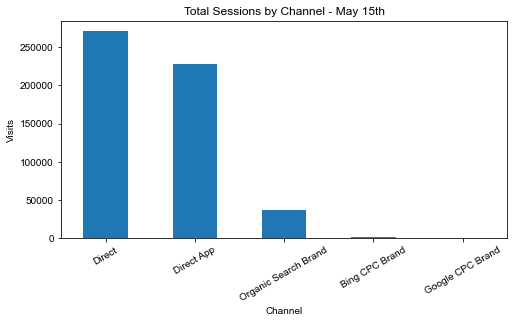

In [5]:
# Plotting the total sessions by Channel
waterfall.sort_values(by=['total_sessions'], inplace=True, ascending=False)

waterfall['total_sessions'].plot(x='channel', kind='bar', stacked=True, title='Total Sessions by Channel - May 15th',
                                xlabel='Channel', ylabel='Visits', figsize=(8,4))

plt.xticks(rotation=30, horizontalalignment='center')
sns.set_style('dark')

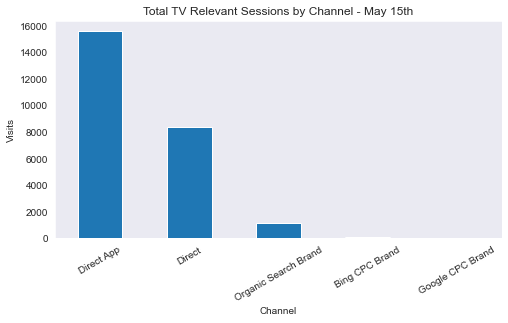

In [7]:
# Plotting the tv relevant sessions by Session

waterfall.sort_values(by=['tv_relevant_sessions'], inplace=True, ascending=False)

waterfall['tv_relevant_sessions'].plot(x='channel', kind='bar', stacked=True, title='Total TV Relevant Sessions by Channel - May 15th',
                                xlabel='Channel', ylabel='Visits', figsize=(8,4))

plt.xticks(rotation=30, horizontalalignment='center');
#sns.set_style('dark')

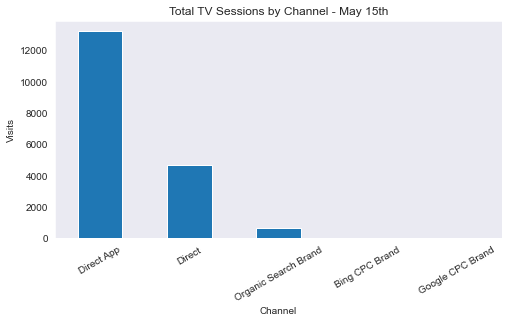

In [8]:
# Plotting TV Visits that satisfy the attribution model and probability
waterfall.sort_values(by=['tv_sessions'], inplace=True, ascending=False)

waterfall['tv_sessions'].plot(x='channel', kind='bar', stacked=True, title='Total TV Sessions by Channel - May 15th',
                                xlabel='Channel', ylabel='Visits', figsize=(8,4))

plt.xticks(rotation=30, horizontalalignment='center')
sns.set_style('dark')

In [9]:
# Accessing view with full visits data to perform analysis

tv_visits = pd.read_sql_query('SELECT * FROM v_tv_visits_full', conn, parse_dates=['date_hour_minute'])
tv_visits.head(3)

,origin,channel,identifier,date_hour_minute,tvp_id,tv_show_id,tv_show,reach,block_size,block_position,spot_id,spot_name,spot_weight,spot_duration,tv_probability
0,app,Direct App,68308b2ca17ca3554546bbf7e8,2020-05-15 18:10:00,10001127236681063068_1553644644,1,First Dates - Ein Tisch für zwei,57000,420,345,4234,springsummer_branding,1.0,30,0.288847
1,app,Direct App,cb51890263cb49761253403353,2020-05-15 18:10:00,10001127236681063068_1553644644,1,First Dates - Ein Tisch für zwei,57000,420,345,4234,springsummer_branding,1.0,30,0.288847
2,app,Direct App,cca4b65d88d67b1acf79c4dc71,2020-05-15 18:10:00,10001127236681063068_1553644644,1,First Dates - Ein Tisch für zwei,57000,420,345,4234,springsummer_branding,1.0,30,0.288847


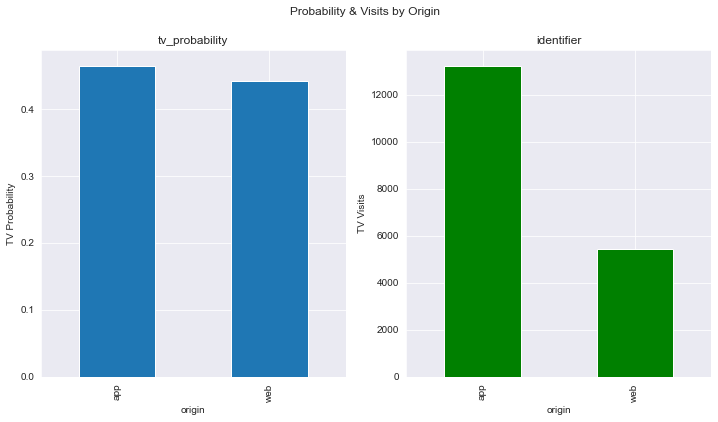

In [10]:
# Origin Distribution of TV Visits
tv_visits.set_index('origin')

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
tv_visits.groupby(['origin'])['tv_probability'].mean().plot(kind='bar',ylabel='TV Probability', grid=True, ax=axes[0],
                                                           subplots=True)

tv_visits.groupby(['origin'])['identifier'].count().plot(kind='bar', title='Probability & Visits by Origin',
                                                            ylabel='TV Visits', grid=True, ax=axes[1], subplots=True,
                                                            color='green');


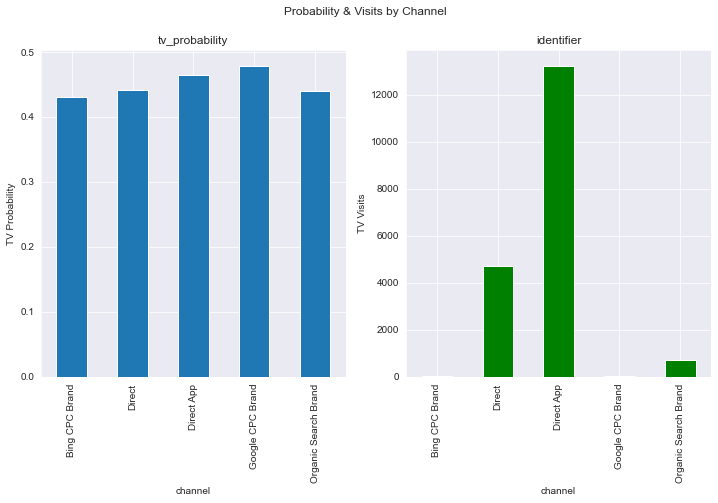

In [12]:
# Channel Distribution of TV Visits
tv_visits.set_index('channel')
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

tv_visits.groupby(['channel'])['tv_probability'].mean().plot(kind='bar', ax=axes[0],
                                                            ylabel='TV Probability', grid=True, subplots=True)

tv_visits.groupby(['channel'])['identifier'].count().plot(kind='bar', title='Probability & Visits by Channel', ax=axes[1],
                                                            ylabel='TV Visits', grid=True, color='green', subplots=True);


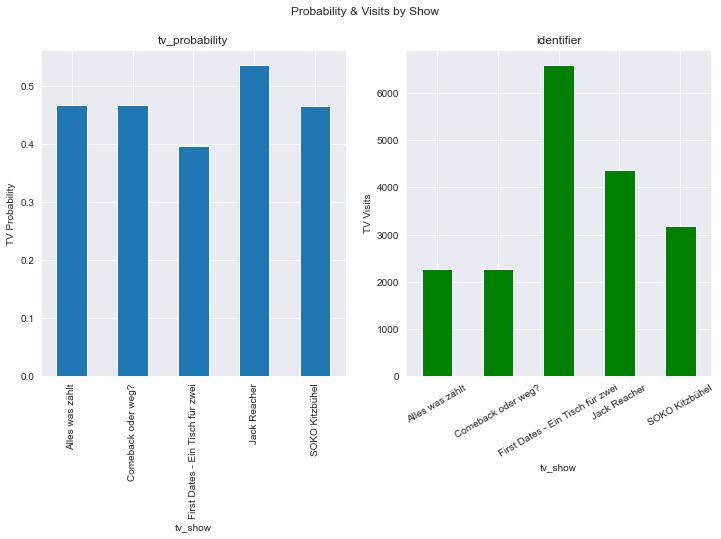

In [13]:
# TV Show Distribution of TV Visits
tv_visits.set_index('tv_show')
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
tv_visits.groupby(['tv_show'])['tv_probability'].mean().plot(kind='bar', ax=axes[0],
                                                            ylabel='TV Probability', grid=True, subplots=True)

tv_visits.groupby(['tv_show'])['identifier'].count().plot(kind='bar', title='Probability & Visits by Show', ax=axes[1],
                                                            ylabel='TV Visits', grid=True, color='green', subplots=True)

plt.xticks(rotation=30, horizontalalignment='center');

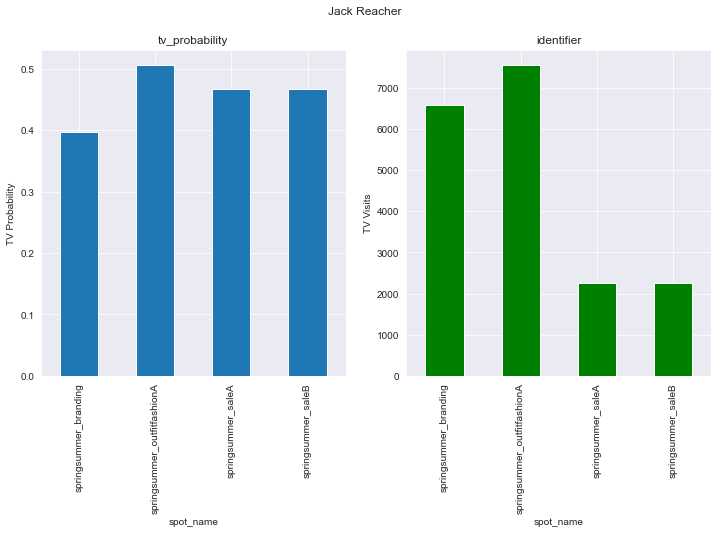

In [23]:
# Deep diving to the show with higher probability and which spot gets more probability and visits
#tv_visits.set_index('tv_show')
tv_visits['tv_show'] = tv_visits.groupby(['tv_show'])['tv_probability'].mean().idxmax()
best_show = tv_visits.groupby(['tv_show'])['tv_probability'].mean().idxmax()
title_show = 'Probability & Visits for {}'.format(best_show)
tv_visits.set_index('spot_name')
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

tv_visits.groupby(['spot_name'])['tv_probability'].mean().plot(kind='bar', title=title_show, ylabel='TV Probability', 
                                                               grid=True, ax=axes[0], subplots=True);
tv_visits.groupby(['spot_name'])['identifier'].count().plot(kind='bar', title=best_show, ylabel='TV Visits', grid=True,
                                                           ax=axes[1], subplots=True, color='green');

In [22]:
# Cleaning tv visits
tv_visits = pd.read_sql_query('SELECT * FROM v_tv_visits_full', conn, parse_dates=['date_hour_minute'])
tv_visits.head(3)

,origin,channel,identifier,date_hour_minute,tvp_id,tv_show_id,tv_show,reach,block_size,block_position,spot_id,spot_name,spot_weight,spot_duration,tv_probability
0,app,Direct App,68308b2ca17ca3554546bbf7e8,2020-05-15 18:10:00,10001127236681063068_1553644644,1,First Dates - Ein Tisch für zwei,57000,420,345,4234,springsummer_branding,1.0,30,0.288847
1,app,Direct App,cb51890263cb49761253403353,2020-05-15 18:10:00,10001127236681063068_1553644644,1,First Dates - Ein Tisch für zwei,57000,420,345,4234,springsummer_branding,1.0,30,0.288847
2,app,Direct App,cca4b65d88d67b1acf79c4dc71,2020-05-15 18:10:00,10001127236681063068_1553644644,1,First Dates - Ein Tisch für zwei,57000,420,345,4234,springsummer_branding,1.0,30,0.288847


In [32]:
# Querying the best show and spot in the visits table
best_spot = tv_visits.groupby(['spot_name'])['tv_probability'].mean().idxmax()
query = 'tv_show == "{0}" & spot_name == "{1}"'.format(best_show, best_spot)
best_visits = tv_visits.query(query)
best_visits.head(5)

,origin,channel,identifier,date_hour_minute,tvp_id,tv_show_id,tv_show,reach,block_size,block_position,spot_id,spot_name,spot_weight,spot_duration,tv_probability
11116,web,Direct,1742815786669900005,2020-05-15 20:14:00,10001127236681063068_1553644647,4,Jack Reacher,162000,60,15,6232,springsummer_outfitfashionA,1.0,15,0.466667
11117,web,Direct,876598616239320001,2020-05-15 20:14:00,10001127236681063068_1553644647,4,Jack Reacher,162000,60,15,6232,springsummer_outfitfashionA,1.0,15,0.466667
11118,web,Direct,1488858045972600002,2020-05-15 20:14:00,10001127236681063068_1553644647,4,Jack Reacher,162000,60,15,6232,springsummer_outfitfashionA,1.0,15,0.466667
11119,web,Direct,9544518937131500002,2020-05-15 20:14:00,10001127236681063068_1553644647,4,Jack Reacher,162000,60,15,6232,springsummer_outfitfashionA,1.0,15,0.466667
11120,web,Direct,218286453338180005,2020-05-15 20:14:00,10001127236681063068_1553644647,4,Jack Reacher,162000,60,15,6232,springsummer_outfitfashionA,1.0,15,0.466667


In [36]:
# Unique block sizes for best show & spot
best_visits.block_size.unique()

array([ 60, 300], dtype=int64)

In [37]:
# Unique block position for best show & spot
best_visits.block_position.unique()

array([ 15, 270], dtype=int64)

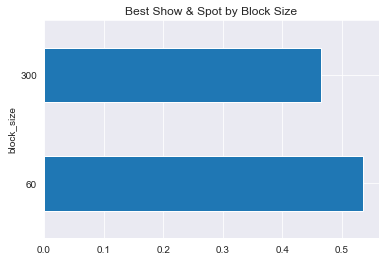

In [46]:
# Comparing block sizes effectiveness
best_visits.groupby('block_size')['tv_probability'].mean().plot(kind='barh', grid=True, 
                                                                title='Best Show & Spot by Block Size');

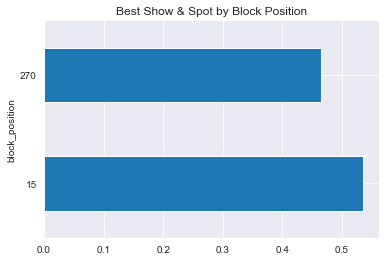

In [45]:
# Comparing block position effectiveness
best_visits.groupby('block_position')['tv_probability'].mean().plot(kind='barh', grid=True, 
                                                                    title='Best Show & Spot by Block Position');

In [55]:
# Participation of the best show & spot in tv visits
best_participation = best_visits['identifier'].count() / tv_visits['identifier'].count()
best_participation

0.404351087771943

In [57]:
tv_visits['identifier'].count()

18662

In [58]:
 tv_visits.groupby(['spot_name'])['tv_probability'].mean()

spot_name
springsummer_branding          0.397010
springsummer_outfitfashionA    0.505500
springsummer_saleA             0.467550
springsummer_saleB             0.467079
Name: tv_probability, dtype: float64